# Information about the dataset

- Dataset Source:The dataset is available on Kaggle: MxMH Survey Results, at https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

- Structure: It contains 736 rows and 33 columns, including 7 numerical features and 26 categorical features. 

- Missing Values: The dataset includes 5,398 missing values, mostly in optional fields such as BPM (beats per minute).

- Data Collection: Data was gathered via a Google Form, where respondents provided insights into their music preferences, listening habits, and self-reported mental health conditions. Mental health scores (e.g., anxiety, depression, insomnia, OCD) were rated on a scale of 0 to 10.

- Participant Demographics: There were no restrictions on age or location. The survey was shared online and promoted in public areas like libraries and parks.

# Aim of the project

The aim of this project is to develop a machine learning solution to classify a specific mental health condition,  "Anxiety" in this case, as significant or not significant based on user-reported data related to music preferences, habits, and potentially correlated mental health conditions. The classification is determined using a threshold of 5: values equal to or exceeding this threshold are labeled as significant (1), while lower values are labeled as not significant (0).

# Import

In [1]:
# Basic Libraries for Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Scikit-learn Transformers and Pipelines
from sklearn.base import BaseEstimator, TransformerMixin  # Custom transformers
from sklearn.compose import ColumnTransformer  # Combine feature transformations
from sklearn.pipeline import Pipeline  # Create machine learning pipelines
from sklearn.impute import SimpleImputer, KNNImputer  # Handle missing data
from sklearn.preprocessing import (  # Preprocessing tools for feature scaling and encoding
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    MaxAbsScaler,
    FunctionTransformer
)

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Model Evaluation Metrics
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    classification_report,
    accuracy_score,
    precision_recall_curve,
    roc_curve,
    auc
)

# Model Selection and Cross-Validation
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    cross_validate,
    learning_curve,
    validation_curve,
    GridSearchCV,
    RandomizedSearchCV
)

# Classifiers and Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC  # Support Vector Classifier

# Data Sampling for Imbalanced Datasets (Imbalanced-learn)
from imblearn.over_sampling import SMOTE, RandomOverSampler  # Oversampling techniques
from imblearn.under_sampling import RandomUnderSampler, TomekLinks  # Undersampling techniques
from imblearn.pipeline import Pipeline as IMBPipeline  # Pipeline compatible with imbalanced-learn

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Statistical Distributions for Hyperparameter Search
from scipy.stats import loguniform, beta, uniform, randint

# Utility Tools
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap

# Visualizing Missing Data
import missingno as msno

Use the Pandas method <code>read_csv</code> to import the dataset.

In [2]:
ds = pd.read_csv('survey_results.csv')

# Data Visualization

Retrieve the dataset's dimensions using the <code>shape</code> attribute.

In [3]:
print(f'Features: {ds.shape[1]}\nElements: {ds.shape[0]}')

Features: 33
Elements: 736


Display the dataset:

In [4]:
ds

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


Obtain details about the dataset's features using the <code>info()</code> method.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Analyze the frequency distribution of unique values in each column to detect imbalances, outliers, or preprocessing needs.

In [6]:
for column in ds.columns:
    print(ds[column].value_counts())
    print('-'*50)

8/28/2022 16:15:08    2
9/1/2022 18:38:46     1
9/1/2022 19:08:55     1
9/1/2022 19:09:32     1
9/1/2022 19:36:54     1
                     ..
8/28/2022 23:34:37    1
8/28/2022 23:40:54    1
8/28/2022 23:42:24    1
8/28/2022 23:47:13    1
8/28/2022 23:04:08    1
Name: Timestamp, Length: 735, dtype: int64
--------------------------------------------------
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
80.0     1
50.0     1
68.0     1
46.0     1
89.0     1
Name: Age, Length: 61, dtype: int64
--------------------------------------------------
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: Primary streaming service, dtype: int64
--------------------------------------------------
2.00     173
3.00     120
1.00     117
4.00      83
5.00      54
6.00      47
8.00      29


The dataset comprises a combination of numerical and categorical features. Variables, such as 'Age' and mental health scores ('Anxiety', 'Depression', etc.), reveal distinct distributions; categorical features, including 'Primary streaming service' and genre frequency, demonstrate imbalances, with certain categories, like Spotify, showing dominance.

## Missing Values

Calculate the total count and percentage of missing values for each column.

In [7]:
missing_data= pd.DataFrame({
    'Missing Values': ds.isnull().sum(axis=0),
    'Percentage (%)': (ds.isnull().sum(axis=0) / ds.shape[0]) * 100
})

print(missing_data)

                              Missing Values  Percentage (%)
Timestamp                                  0        0.000000
Age                                        1        0.135870
Primary streaming service                  1        0.135870
Hours per day                              0        0.000000
While working                              3        0.407609
Instrumentalist                            4        0.543478
Composer                                   1        0.135870
Fav genre                                  0        0.000000
Exploratory                                0        0.000000
Foreign languages                          4        0.543478
BPM                                      107       14.538043
Frequency [Classical]                      0        0.000000
Frequency [Country]                        0        0.000000
Frequency [EDM]                            0        0.000000
Frequency [Folk]                           0        0.000000
Frequency [Gospel]      

Visualize the distribution of missing values in the dataset using the <code>missingno.matrix</code> method.

<Axes: >

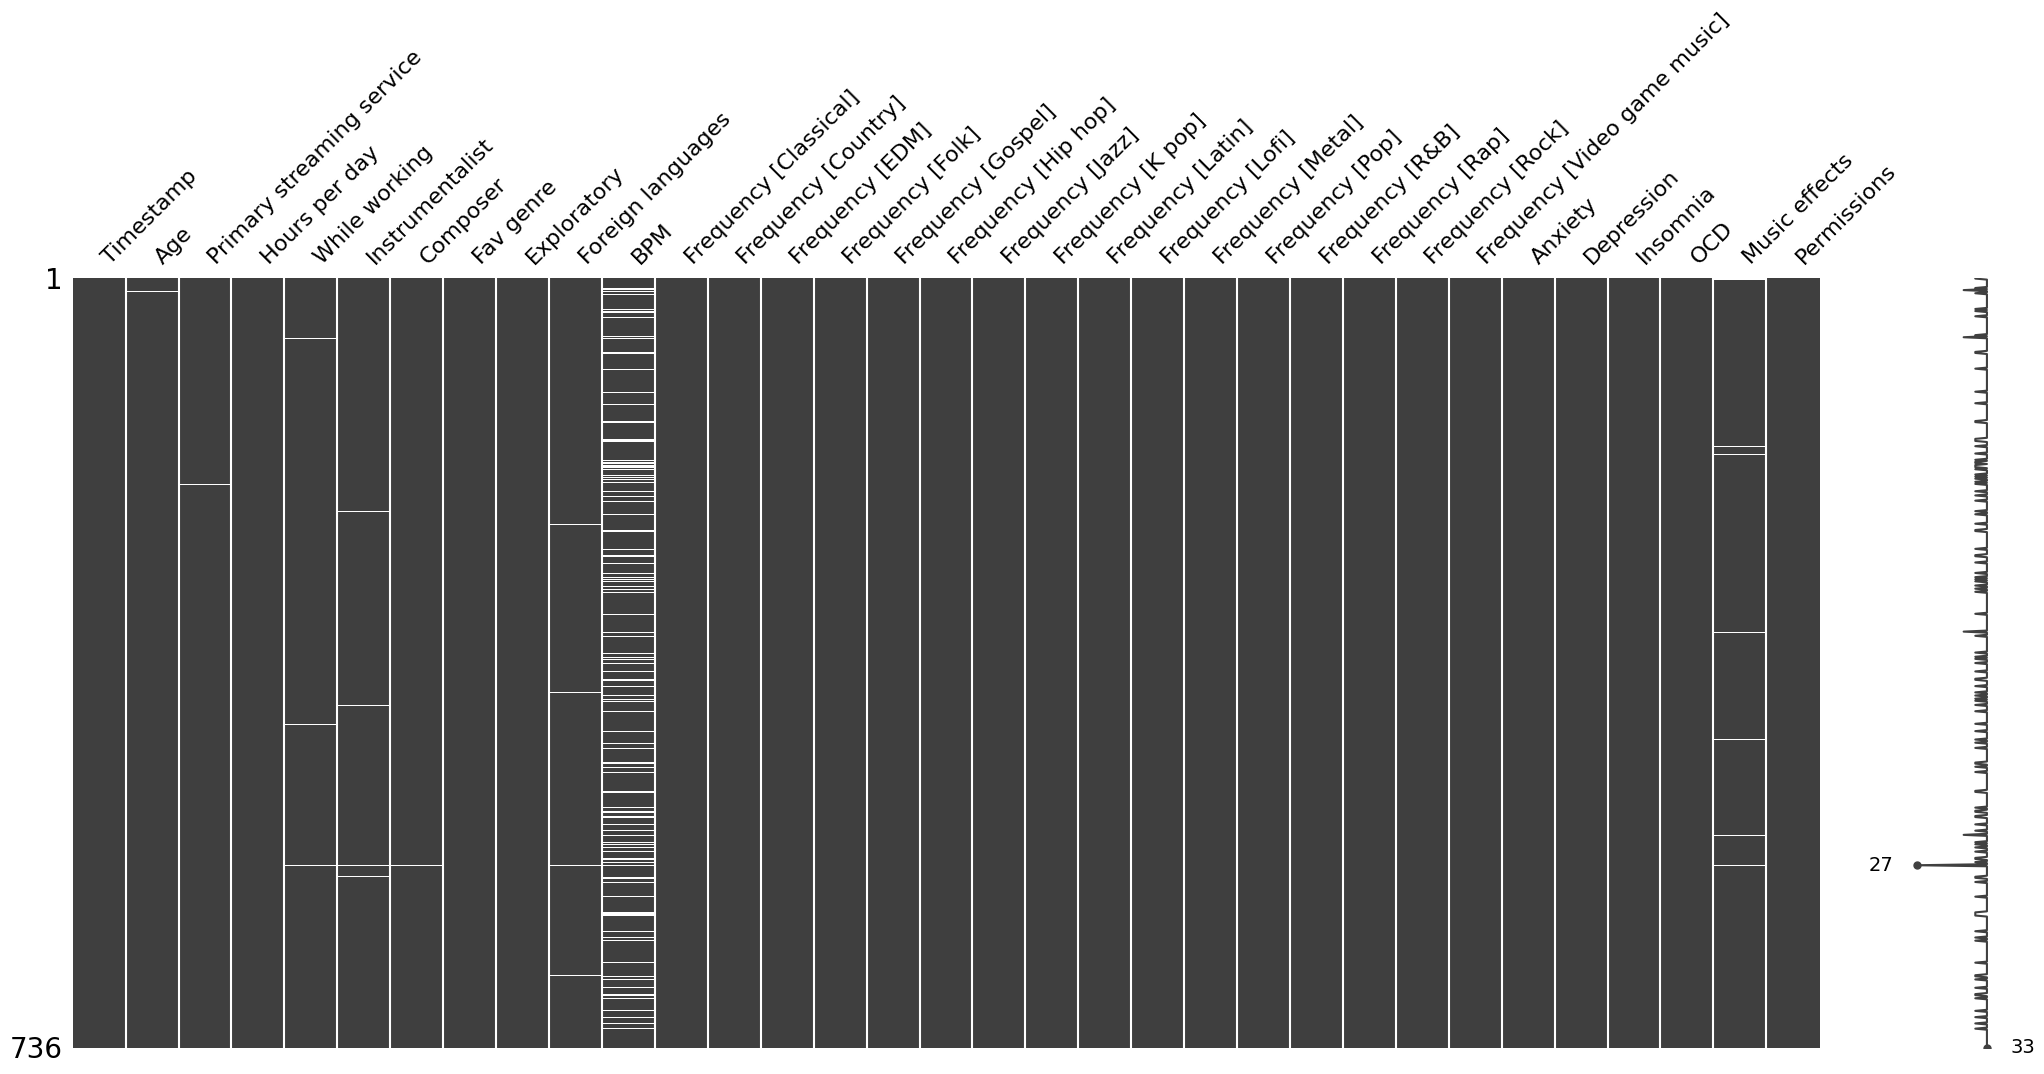

In [8]:
msno.matrix(ds)

In this dataset, the proportion of missing values is minimal and unlikely to significantly affect analysis. The *BPM* column has the highest number of missing values and may require targeted handling

## Target Balance

To evaluate the balance of the target column, *Anxiety*, the first plot shows a histogram of the raw data, ranging from 0 to 10. This visualization provides an overview of the overall distribution and helps justify the selection of a threshold. Fixing the threshold at 5, the second plot illustrates the classification into significant (≥5) and non-significant (<5) cases, providing a clearer understanding of how the data is divided based on this criterion.

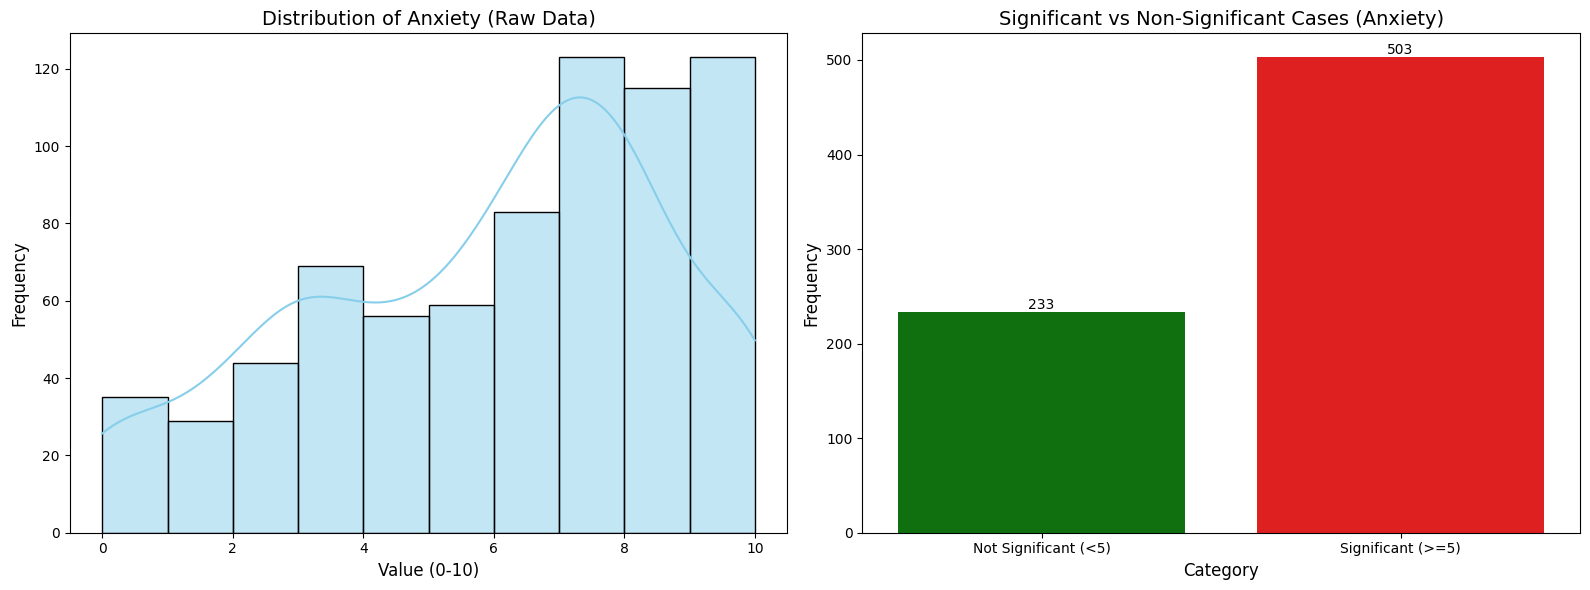

In [9]:
threshold = 5

# Calculate counts for significant and non-significant cases
counts = [
    (ds['Anxiety'] < threshold).sum(),  # Not Significant
    (ds['Anxiety'] >= threshold).sum()  # Significant
]

# Create a DataFrame for easier manipulation and plotting
counts_df = pd.DataFrame({
    "Category": ["Not Significant (<5)", "Significant (>=5)"], 
    "Frequency": counts
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of raw data
sns.histplot(
    ds['Anxiety'].dropna(), bins=10, kde=True, color='skyblue', ax=axes[0]
)
axes[0].set_title('Distribution of Anxiety (Raw Data)', fontsize=14)
axes[0].set_xlabel('Value (0-10)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Plot 2: Significant vs Non-Significant Cases
sns.barplot(
    x="Category", y="Frequency", data=counts_df, palette=["green", "red"], ax=axes[1]
)
axes[1].set_title('Significant vs Non-Significant Cases (Anxiety)', fontsize=14)
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Add labels to the top of bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

plt.tight_layout()
plt.show()

The data reveals a clear imbalance in the *Anxiety* variable, with the significant anxiety class (≥5) being much more prevalent than the non-significant class (<5). This imbalance could introduce model bias, making the model more inclined to predict the majority class. To mitigate this, balancing techniques will be applied during model selection and training. Additionally, performance will be evaluated using metrics tailored for imbalanced datasets, such as recall and F1-score, to ensure robust and fair assessment.

## Correlation heatmap between Anxiety and the other mental health parameters

I analyze this correlation heatmap to explore relationships between mental health parameters, aiming to identify potential predictors for *Anxiety* and understand their interdependencies

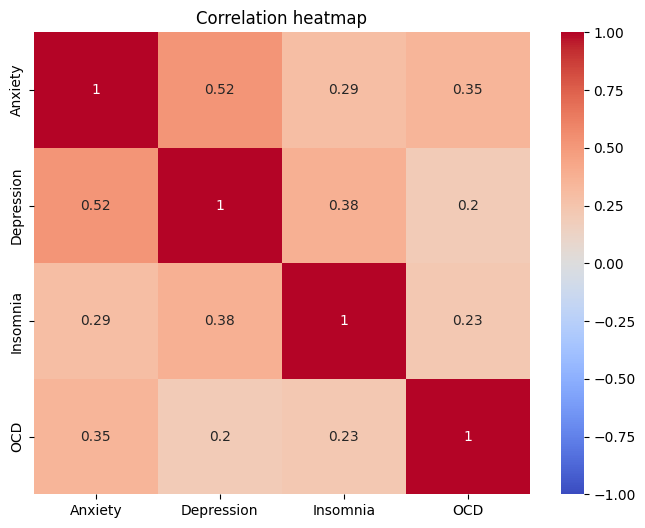

In [10]:
correlation_matrix = ds[['Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

The strong correlation between *Anxiety* and *Depression* indicates that Depression is a significant factor in predicting *Anxiety*. While *Insomnia* and *OCD* show weaker correlations with the target, they still provide valuable insights into additional mental health factors that contribute to anxiety levels. By including all these features, the model will be able to capture the complex interplay between the different mental health conditions, leading to a more accurate prediction of anxiety.

## Correlation between Anxiety and the favorite genres 

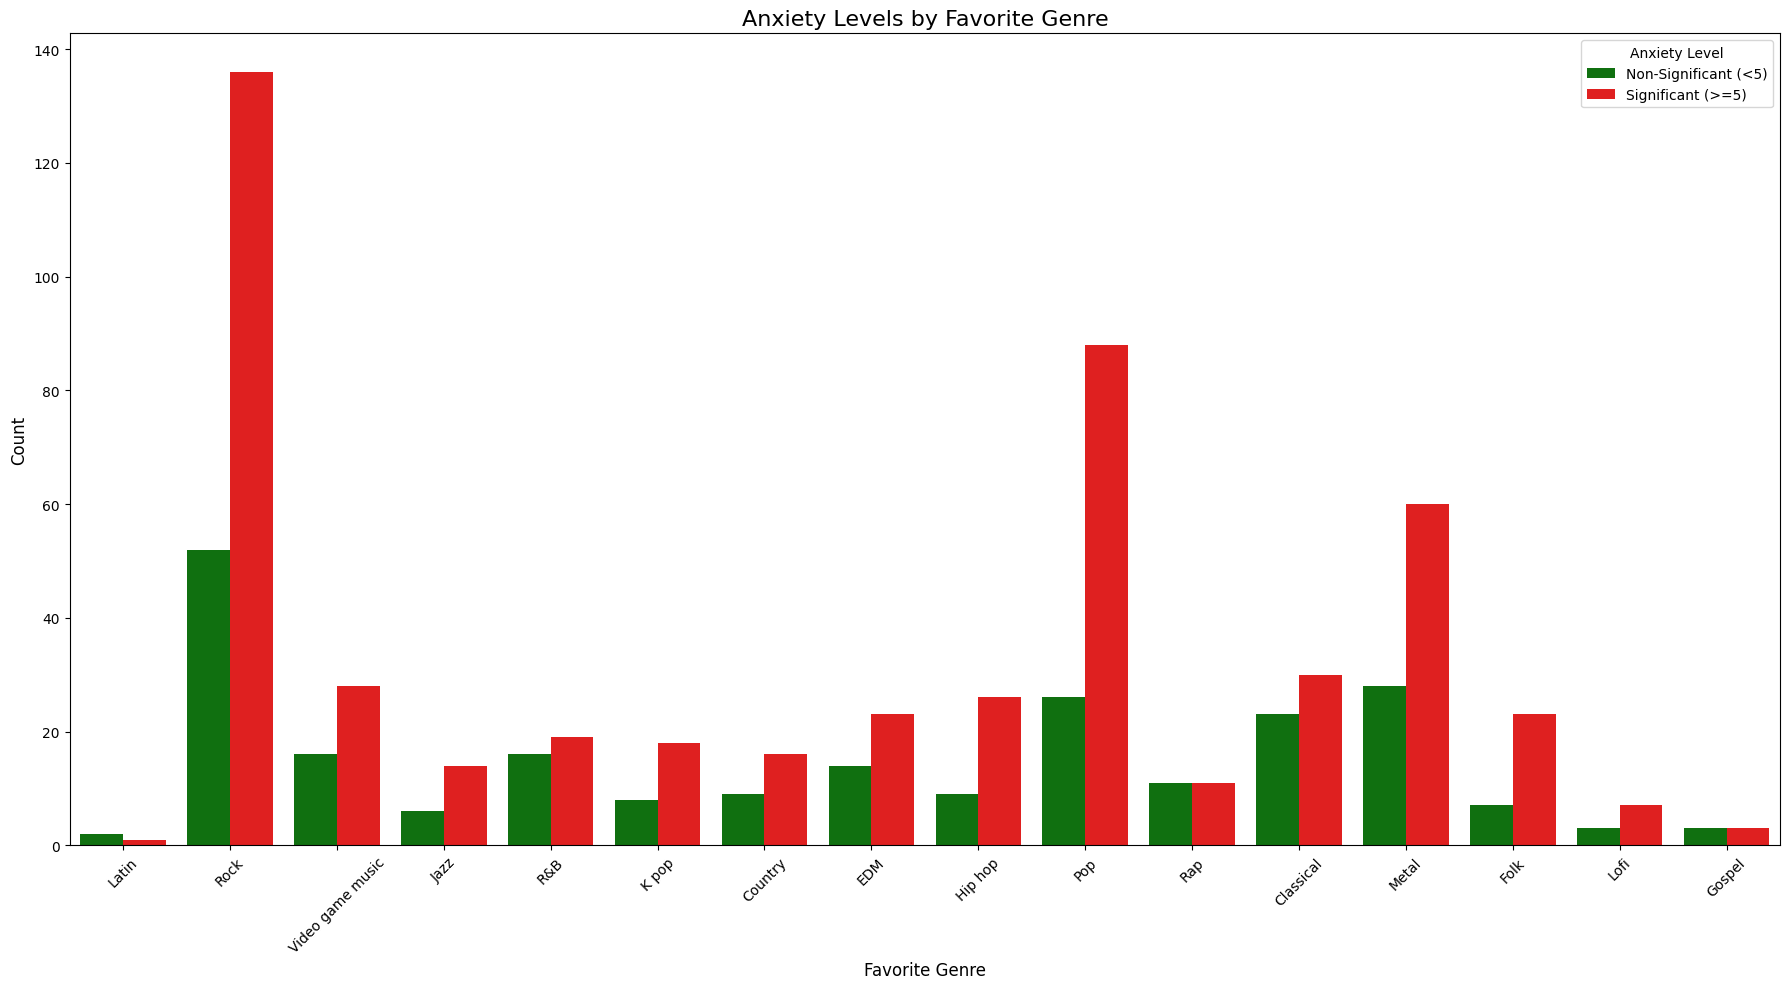

In [11]:
plt.figure(figsize=(18, 10))

sns.countplot(
    data=ds, 
    x='Fav genre', 
    hue=np.where(ds['Anxiety'] >= threshold, 'Significant (>=5)', 'Non-Significant (<5)'),  # Dynamically create hue
    palette={'Non-Significant (<5)': 'green', 'Significant (>=5)': 'red'}
)

plt.title('Anxiety Levels by Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Anxiety Level', fontsize=10)
plt.tight_layout()
plt.show()

From this data visualization, we observe that certain music genres, like Pop and Rap, are strongly associated with higher anxiety levels, while genres such as Latin and Video Game Music show a greater prevalence of non-significant anxiety. This suggests that music preferences may influence or reflect anxiety levels. Given these correlations, favorite music genre can be considered an effective predictor for anxiety.

# Data Pre-Processing

## Deleting useless features

The columns *Timestamp, Primary Streaming Service,* and *Permissions* are dropped from the dataset using the <code>drop</code> method, as they do not contribute meaningful information to the goal of the project.

In [12]:
ds.drop(['Timestamp', 'Primary streaming service', 'Permissions'], axis=1, inplace=True)

## Cleaning Column Names for Consistency and Readability

Column names are cleaned by replacing special characters such as [, ], and < with underscores (_). This enhances readability, prevents potential errors during data manipulation, and maintains consistent naming conventions.

In [13]:
ds.columns = ds.columns.str.replace(r'[\[\]<]', '_', regex=True)
print(ds.columns)

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Fav genre', 'Exploratory', 'Foreign languages', 'BPM',
       'Frequency _Classical_', 'Frequency _Country_', 'Frequency _EDM_',
       'Frequency _Folk_', 'Frequency _Gospel_', 'Frequency _Hip hop_',
       'Frequency _Jazz_', 'Frequency _K pop_', 'Frequency _Latin_',
       'Frequency _Lofi_', 'Frequency _Metal_', 'Frequency _Pop_',
       'Frequency _R&B_', 'Frequency _Rap_', 'Frequency _Rock_',
       'Frequency _Video game music_', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects'],
      dtype='object')


## Outlier cleaning

BPM values less than 20 and greater than 250 are considered unrealistic for music and are removed.


In [14]:
# Count and display the number of unrealistic BPM values
bpm_below_20 = ds[ds['BPM'] < 20].shape[0]
bpm_above_250 = ds[ds['BPM'] > 250].shape[0]

print(f"Number of BPM values below 20: {bpm_below_20}")
print(f"Number of BPM values above 250: {bpm_above_250}")

# Remove unrealistic BPM values
ds.drop(ds[(ds['BPM'] < 20) | (ds['BPM'] > 250)].index, inplace=True)

Number of BPM values below 20: 5
Number of BPM values above 250: 2


## Transformation of the Target Column

The target column is now transformed into binary format using te threshold of 5.  This step classifies values greater than or equal to 5 as significant (1) and values below 5 as not significant (0).

In [15]:
# Transform the target column 'Anxiety' into binary format: values >=5 as significant (1) and <5 as not significant (0)
ds['Anxiety'] = (ds['Anxiety'] >= threshold).astype(int)

print("Transformed 'Anxiety' column into binary format:")
print(ds['Anxiety'].head())

print("Distribution for 'Anxiety':")
counts = ds['Anxiety'].value_counts()
percentages = ds['Anxiety'].value_counts(normalize=True) * 100

for value in counts.index:
    print(f"Class {value}: {counts[value]} instances ({percentages[value]:.2f}%)")

print('-' * 50)


Transformed 'Anxiety' column into binary format:
0    0
1    1
2    1
3    1
4    1
Name: Anxiety, dtype: int64
Distribution for 'Anxiety':
Class 1: 498 instances (68.31%)
Class 0: 231 instances (31.69%)
--------------------------------------------------


## Data Transformation Pipeline

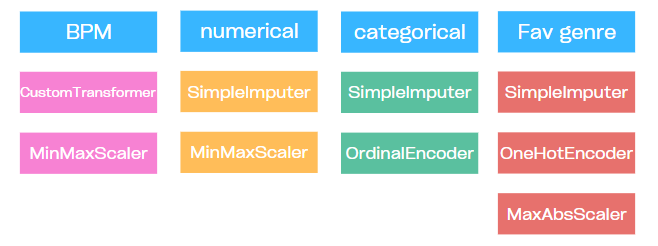

### Custom transfomer for BPM

The custom transformer imputes missing values in the BPM column based on the average BPM for each preferred music genre (Fav genre). If a genre does not have sufficient data to compute an average, the mean strategy is applied.

This method improves data transformation by imputing missing BPM values based on genre-specific averages, addressing the column with the most missing data while preserving dataset structure and minimizing noise.

In [16]:
class BPMImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fallback='global_mean'):

        self.fallback = fallback
        self.genre_means_ = None
        self.global_mean_ = None

    def fit(self, X, y=None):
        # Calculate the mean BPM for each music genre
        self.genre_means_ = X.groupby('Fav genre')['BPM'].mean()
        
        # Calculate the global mean BPM as a fallback
        self.global_mean_ = X['BPM'].mean()
        return self

    def transform(self, X, y=None):
        X = X.copy()
        
        # Replace missing BPM values with the mean of the corresponding genre
        for genre, mean in self.genre_means_.items():
            mask = (X['Fav genre'] == genre) & (X['BPM'].isnull())
            X.loc[mask, 'BPM'] = mean

        # Handle genres without sufficient BPM data
        if self.fallback == 'global_mean':
            X['BPM'] = X['BPM'].fillna(self.global_mean_)
        
        return X[['BPM']]  # Return only the `BPM` column
    
    def get_feature_names_out(self, input_features=None):
        # Return the column name as the output feature name
        return ['BPM']

### Pipeline for numerical data

1. Feature: *BPM*
- <code>BPMImputer</code>: Missing values are imputed using the custom transformer.
- <code>MinMaxScaler</code> : All features are scaled to a range of [0, 1] to normalize their values.

In [17]:
pipeline_BPM = Pipeline(steps=[
    ('imputer', BPMImputer(fallback='global_mean')),
    ('scaler', MinMaxScaler())
])

2. Features: *Depression, Insomnia, OCD, Hours per day, Age*
- <code>SimpleImputer</code>: Missing values in these numerical features are imputed using the mean strategy.
- <code>MinMaxScaler</code>

In [18]:
pipeline_numerical = Pipeline(steps=[
    ('null', SimpleImputer(strategy='mean')),
    ('min_max', MinMaxScaler())  # Scale to [0, 1]
])

numerical_columns = ['Depression', 'Insomnia', 'OCD','Age', 'Hours per day']

### Pipeline for categorical data

1. Features: *While working, Instrumentalist, Composer, Music effect, Foreign languages, Exploratory*, and *Frequencies*
- <code>SimpleImputer</code>: Missing values are imputed using the most frequent value for each feature.
- <code>OrdinalEncoder</code>: Encodes ordinal categories into numerical values.

In [19]:
pipeline_categorical = Pipeline(steps=[
    ('null', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

categorical_columns = ['While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Exploratory',
       'Frequency _Classical_', 'Frequency _Country_', 'Frequency _EDM_',
       'Frequency _Folk_', 'Frequency _Gospel_', 'Frequency _Hip hop_',
       'Frequency _Jazz_', 'Frequency _K pop_', 'Frequency _Latin_',
       'Frequency _Lofi_', 'Frequency _Metal_', 'Frequency _Pop_',
       'Frequency _R&B_', 'Frequency _Rap_', 'Frequency _Rock_',
       'Frequency _Video game music_', 'Music effects']

2. Feature: *Fav genre*
- <code>SimpleImputer</code>: Missing values are imputed using the most frequent value.
- <code>OneHotEncoder</code>: Converts the categorical feature into binary indicators for each genre.
- <code>MaxAbsScaler</code>: Scales the resulting one-hot encoded values to normalize sparse binary features.

In [20]:
pipeline_fav_genre = Pipeline(steps=[
    ('null', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore')),
    ('max_abs', MaxAbsScaler())
])

### Definition of the final ColumnTransformer

I use the <code>ColumnTransformer</code> to efficiently aggregate the previously defined preprocessing pipelines, ensuring a coherent and streamlined transformation process.

In [21]:
data_transformer = ColumnTransformer(transformers=[
    ('numerical', pipeline_numerical, numerical_columns),
    ('bpm', pipeline_BPM, ['BPM', 'Fav genre']),
    ('categorical', pipeline_categorical, categorical_columns),
    ('fav_genre', pipeline_fav_genre, ['Fav genre'])

],
verbose_feature_names_out=False, #Not include original column names and transformation details in the feature names
sparse_threshold=0,              #Represent the transformed data in sparse format, regardless of its density
remainder='passthrough'          #All the columns that are not specified above are left unmodified
)

## Training and test sets

Split the dataset into training and test sets using the <code>train_test_split()</code> method, allocating 80% of the data for training and 20% for testing (<code>test_size=0.2</code>).
This approach ensures the test set represents unseen data, enabling a reliable evaluation of the model's performance and generalization capabilities.
Stratified sampling is applied to maintain the class distribution in the target variable, preventing imbalances that could negatively affect model training and evaluation

In [22]:
# Define X (features) and y (target)
X = ds.drop(columns='Anxiety')  # Remove 'Anxiety' from X
y = ds['Anxiety']  # 'Anxiety' is the binary target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Input data
    y,                    # Target variable
    test_size=0.2,        # Size of the test set (20%)
    stratify=y,           # Ensure the class distribution in y is preserved in both train and test sets
    shuffle=True,         # Shuffle the data before splitting
    random_state=42       # Ensure reproducibility of the split
)

### Data transformation

 The *ColumnTransformer* is fitted on the training set to learn transformation parameters and then applied to both the training and test sets, ensuring fair evaluation and avoiding data leakage.

In [23]:
# Fit the ColumnTransformer on the training set
data_transformer.fit(X_train)

# Transform the training set
X_train_transformed = data_transformer.transform(X_train)

# Transform the test set
# Use the fitted transformer to ensure the same transformations are applied to the test set
X_test_transformed = data_transformer.transform(X_test)

The transformed data is converted into a DataFrame for improved readability and easier debugging. Column names are assigned using <code>get_feature_names_out()</code> to provide clear and consistent feature tracking throughout the workflow.

In [24]:
# Convert X_train_transformed to a DataFrame
X_train_transformed_df = pd.DataFrame(
    X_train_transformed, 
    columns=data_transformer.get_feature_names_out()
)

# Convert X_test_transformed to a DataFrame
X_test_transformed_df = pd.DataFrame(
    X_test_transformed, 
    columns=data_transformer.get_feature_names_out()
)

Verifying the dataset ensures that transformations applied as intended and missing values have been correctly imputed.

In [25]:
# Verify the transformations
print("Shape of X_train after transformation:", X_train_transformed_df.shape)
print("Shape of X_test after transformation:", X_test_transformed_df.shape)

# Preview the transformed datasets
print("Preview of transformed training set:")
print(X_train_transformed_df.head())
print("\nPreview of transformed test set:")
print(X_test_transformed_df.head())

Shape of X_train after transformation: (583, 43)
Shape of X_test after transformation: (146, 43)
Preview of transformed training set:
   Depression  Insomnia  OCD       Age  Hours per day    BPM  While working  \
0         0.5       0.3  0.3  0.113924       0.125000  0.475            1.0   
1         0.6       0.7  0.5  0.164557       0.166667  0.290            1.0   
2         0.3       0.5  0.2  0.113924       0.208333  0.800            1.0   
3         0.6       0.8  0.2  0.088608       0.125000  0.500            1.0   
4         0.7       0.2  0.1  0.189873       0.208333  0.525            1.0   

   Instrumentalist  Composer  Foreign languages  ...  Fav genre_Jazz  \
0              0.0       0.0                1.0  ...             0.0   
1              0.0       0.0                1.0  ...             0.0   
2              1.0       1.0                1.0  ...             0.0   
3              0.0       0.0                1.0  ...             0.0   
4              1.0       0.0   

In [26]:
# Check missing values in the transformed training set
print("Missing values in the transformed training set:")
print(X_train_transformed_df.isnull().sum())

# Check missing values in the transformed test set
print("Missing values in the transformed test set:")
print(X_test_transformed_df.isnull().sum())

Missing values in the transformed training set:
Depression                      0
Insomnia                        0
OCD                             0
Age                             0
Hours per day                   0
BPM                             0
While working                   0
Instrumentalist                 0
Composer                        0
Foreign languages               0
Exploratory                     0
Frequency _Classical_           0
Frequency _Country_             0
Frequency _EDM_                 0
Frequency _Folk_                0
Frequency _Gospel_              0
Frequency _Hip hop_             0
Frequency _Jazz_                0
Frequency _K pop_               0
Frequency _Latin_               0
Frequency _Lofi_                0
Frequency _Metal_               0
Frequency _Pop_                 0
Frequency _R&B_                 0
Frequency _Rap_                 0
Frequency _Rock_                0
Frequency _Video game music_    0
Music effects                   0


# Model Selection

Through the process of model selection, we aim to identify the most effective algorithm (the "best model") among various classifiers.
To achieve this, we construct an IMBPipeline, which is applied to X_train and y_train. This pipeline integrates class balancing, feature reduction, and classification into a cohesive and systematic workflow. Specifically, we implement the following steps:
- *Sampler*: Balances the dataset by addressing class imbalance, ensuring the model learns equally from all classes.

- *Dimensionality Reduction*: Simplifies the dataset by reducing the number of features, removing redundancy, and improving computational efficiency.

- *Classifier*: The final step that applies a machine learning algorithm to predict the target variable based on the processed data.

In [27]:
model_pipeline = IMBPipeline(steps=[
    ('transformation', data_transformer),       # Use the ColumnTransformer
    ('sampler', SMOTE(random_state=42)),        # SMOTE for class balancing
    ('dim_reduction', PCA(n_components=0.8)),   # PCA for dimensionality reduction
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision Tree Classifier
])

y_train_task = y_train.values 

In [28]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['Depression', 'Insomnia',
                                                   'OCD', 'Age',
                                                   'Hours per day']),
                                                 ('bpm',
                                                  Pipeline(steps=[('imputer',
                                                                   BPMImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BPM', 'Fav genre']),
                                                 ('categor...
                                                 ('fav_genre',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('max_abs',
                                                                   MaxAbsScaler())]),
                                                  ['Fav genre'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(random_state=42)),
                ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Configurations

For each step of the pipeline model_pipeline, define a list of admissible parameter distribution.

### Samplers' configuration dictionary

- <code>SMOTE</code>: SMOTE (Synthetic Minority Oversampling Technique) improves class balance by generating synthetic samples for the minority class. It does this by interpolating between a randomly selected sample and its k-nearest neighbors, avoiding simple duplication of data.

- <code>RandomOverSampler</code>:  This technique balances the dataset by randomly duplicating existing samples from the minority class, increasing its representation.

- <code>TomekLinks</code>: It  identifies pairs of samples from different classes that are closest to each other and remove them, effectively cleaning the decision boundary and reducing noise.

In [29]:
sampler_configurations = [
    {
        'sampler': [None],  # The element is bypassed
    },
    {
        'sampler': [SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy': ['minority', 0.9, 0.7]
    },
    {
        'sampler': [RandomOverSampler()],
        'sampler__sampling_strategy': ['minority', 0.9, 0.7]
    },

    {
        'sampler': [TomekLinks()],
        'sampler__sampling_strategy': ['majority']
    }
]

### Dimensionality reduction's configuration dictionary

- <code>LDA</code> (Linear Discriminant Analysis): A supervised dimensionality reduction method that leverages class labels to project data into a lower-dimensional subspace. Its goal is to maximize the separation (distance) between class means while minimizing the spread (variance) within each class.

- <code>PCA</code> (Principal Component Analysis): An unsupervised method transforms high-dimensional data into a lower-dimensional space while preserving as much variance (information) as possible. It achieves this by finding new, uncorrelated axes called principal components (PCs), ordered by the amount of variance they explain in the data.

- <code>SFS</code> (Sequential Feature Selection): A feature selection technique that iteratively adds or removes features based on their contribution to model performance, identifying the most relevant features while balancing model complexity and predictive accuracy.

In [30]:
dim_reduction_configurations = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

### Classifiers' configuration dictionary

- <code>KNeighborsClassifier</code>: An instance-based classifier that predicts the class of a data point by considering its k-nearest neighbors in the feature space. The class is determined by majority voting among the neighbors.

- <code>RandomForestClassifier</code>: An ensemble learning algorithm that combines multiple decision trees, each trained on bootstrapped subsets of the training data (random subsets, drawn with replacement). By introducing randomness in feature selection at each split and averaging the predictions from all trees, it achieves high accuracy, reduces overfitting, and improves generalization.

- <code>DecisionTreeClassifier</code>: A machine learning model that partitions the feature space recursively by choosing features and split points that optimize a split quality criterion. It builds a tree-like structure where internal nodes represent feature-based decisions, branches represent outcomes, and leaf nodes represent class labels. 

- <code>SVM</code> (Support Vector Machine): A supervised learning algorithm that identifies the hyperplane that maximizes the margin between data points of different classes.

- <code>Perceptron</code>: A linear classifier that adjusts weights iteratively to find a decision boundary separating classes.

- <code>BaggingClassifier</code>: An ensemble method that trains multiple classifiers on different boostrap samples and then aggregate their individual predictions (by majority voting) to select the most predicted one.

- <code>AdaBoostClassifier</code>: An ensemble method that combines multiple weak learners by iteratively assigning higher weights to misclassified instances, building a strong classifier through weighted majority voting.

- <code>LogisticRegression</code>: A linear model that predicts class probabilities based on the logistic (sigmoid) function.

In [31]:
classifier_configurations = [

    # KNeighborsClassifier
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9],         # Number of neighbors considered for predictions
        'classifier__weights': ['uniform', 'distance'],  # Weighting neighbors' contributions
        'classifier__metric': ['minkowski'],             # Distance metric
        'classifier__p': [1, 2],                         # Minkowski distance power parameter
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']  # Algorithm for nearest neighbors search
    },

    # RandomForestClassifier
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],      # Number of trees in the forest
        'classifier__max_depth': [None, 10, 20],         # Maximum tree depth
        'classifier__min_samples_split': [2, 5],         # Minimum samples for a split
        'classifier__min_samples_leaf': [1, 2],          # Minimum samples at a leaf node
        'classifier__max_features': [None, 'sqrt', 'log2'], # Features considered for the best split
        'classifier__bootstrap': [True, False],          # Use bootstrap samples
        'classifier__random_state': [42]                 # Seed for reproducibility
    },

    # DecisionTreeClassifier
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__criterion': ['gini', 'entropy'],    # Split quality criterion
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2],  
        'classifier__max_features': [None, 'sqrt', 'log2'], 
        'classifier__random_state': [42] 
    },

    # SVM (Support Vector Machine)
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],                   # Regularization strength
        'classifier__kernel': ['linear', 'rbf'],         # Kernel types for decision boundaries
        'classifier__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf'
        'classifier__class_weight': ['balanced', {0: 1, 1: 10}],
    },

    # Perceptron
    {
        'classifier': [Perceptron()],
        'classifier__penalty': [None, 'l1', 'l2'],       # Regularization term
        'classifier__alpha': [0.0001, 0.001],            # Regularization strength
        'classifier__max_iter': [1000],                  # Maximum number of iterations
        'classifier__random_state': [42]                 # Seed for reproducibility
    },

    # BaggingClassifier
    {
    'classifier': [BaggingClassifier()],
    'classifier__estimator': [
        DecisionTreeClassifier(random_state=42),
        SVC(kernel='linear', C=1.0, random_state=42)
    ],
    'classifier__n_estimators': [10, 50, 100],       # Number of base estimators
    'classifier__max_samples': [0.8, 1.0],           # Fraction of samples for each base estimator
    'classifier__max_features': [0.8, 1.0],          # Fraction of features for each base estimator
    'classifier__bootstrap': [True],
    'classifier__n_jobs': [-1],
    'classifier__random_state': [42] 
    },

    # AdaBoostClassifier
    {
    'classifier': [AdaBoostClassifier()],
    'classifier__estimator': [
        DecisionTreeClassifier(random_state=42, max_depth=1)
    ],
    'classifier__n_estimators': [10, 50, 100],         # Number of boosting rounds
    'classifier__learning_rate': [0.01, 0.1],          # Shrinks weights for boosting
    'classifier__random_state': [42]                   # Ensure reproducibility
    },

    # LogisticRegression
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l2'],                   # Regularization type
        'classifier__C': [0.1, 1, 10],                   # Regularization strength
        'classifier__solver': ['lbfgs', 'liblinear'],    # Optimization algorithms
        'classifier__class_weight': ['balanced']         # Handle class imbalance
    }
]

Generate all possible configurations for the pipeline by combining the sampler, dimensionality reduction, and classifier configurations using <code>itertools.product</code>. This process creates a list of all parameter combinations that can be tested during model selection.

In [32]:
all_configurations = [dict(
    itertools.chain(*(e.items() for e in configuration))) 
    for configuration in itertools.product(
        sampler_configurations, 
        dim_reduction_configurations, 
        classifier_configurations)]

In [33]:
f'Number of all possible configurations: {len(all_configurations)}'

'Number of all possible configurations: 128'

## Model selection with Nested Cross-Validation

*Nested cross-validation* is useful to find the best configuration among different ML algorithms. It is composed by:
- Inner loop: use <code>RandomizedSearchCV</code> for hyperparameter optimization.
- Outer loop: use <code>cross_validate</code> with the best candidate identified in the inner loop as hyperparameter.

The *RandomizedSearchCV* object takes the list of all configurations, performs a *2-fold cross-validation*, and uses the *F1 score* as the scoring metric to evaluate model performance. The <code>n_iter</code> parameter is set to explore a multiple of the total configurations, ensuring sufficient coverage of the hyperparameter space.

In [34]:
#Inner loop
rs = RandomizedSearchCV(model_pipeline,               # The pipeline to optimize
    param_distributions=all_configurations,           # The configurations to test
    n_iter=len(all_configurations)* 5,                # Number of configurations to try
    n_jobs=-1,                                        # Number of jobs to run in parallel 
    cv=2,                                             # 2-fold cross-validation
    scoring='f1',                                     # Scoring metric
    error_score = 'raise',                            #Display errors
)

Implement the *outer loop* using the <code>cross_validate</code> function to evaluate model performance. Use *F1* as the scoring metric and perform *5-fold cross-validation* to ensure robust evaluation. Set <code>return_estimator=True</code> to retrieve the best estimators for each fold, enabling detailed analysis of the selected models.

In [35]:
# Outer loop
scores_anxiety = cross_validate(
    estimator = rs,                              # RandomizedSearchCV object
    X = X_train,
    y = y_train,
    scoring='f1',                                # Scoring metric
    cv = 5,                                      # 5-fold cross-validation
    return_estimator = True,                     # Return estimators for further analysis
    verbose = 3,
    n_jobs = -1,
    error_score =  'raise'
)

[CV] END ......................................., score=0.802 total time=18.0min
[CV] END ......................................., score=0.788 total time=18.9min
[CV] END ......................................., score=0.798 total time=18.8min
[CV] END ......................................., score=0.841 total time=18.0min
[CV] END ......................................., score=0.826 total time=18.6min


For each fold, the best model configuration is retrieved and displayed, including details about the sampler, dimensionality reduction, classifier, their hyperparameters, and the F1 score obtained during cross-validation.

In [36]:
for index, estimator in enumerate(scores_anxiety['estimator']):
    print(f"Fold {index + 1}:")
    print(f"  Sampler: {estimator.best_estimator_.get_params().get('sampler', None)}")
    print(f"  Dimensionality Reduction: {estimator.best_estimator_.get_params().get('dim_reduction', None)}")
    print(f"  Classifier: {estimator.best_estimator_.get_params().get('classifier', None)}")
    if estimator.best_estimator_.get_params().get('classifier', None):
        print(f"    Classifier Parameters: {estimator.best_estimator_.get_params()['classifier'].get_params()}")
    print(f"  F1 Score: {scores_anxiety['test_score'][index]}")
    print('-'*40)

Fold 1:
  Sampler: TomekLinks(sampling_strategy='majority')
  Dimensionality Reduction: SequentialFeatureSelector(cv=None, estimator=Perceptron(), k_features=(5, 5),
                          scoring='f1')
  Classifier: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)
    Classifier Parameters: {'algorithm': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__monotonic_cst': None, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=1, random_state=42), 'learning_r


As we can see from the results, the performance of the models varies depending on the configurations of samplers, dimensionality reduction, and classifiers.

- In Fold 1, the model uses *TomekLinks* to address potential class imbalance and *SequentialFeatureSelector* for dimensionality reduction, with an *AdaBoostClassifier* using a shallow *DecisionTreeClassifier* as the base estimator. This configuration achieves an F1 Score of 0.802.

- In Fold 2, there is no sampler applied, but *SequentialFeatureSelector* is used for dimensionality reduction with a *LogisticRegression* estimator. The classifier is a *BaggingClassifier* with an SVC base estimator. The performance here is slightly lower, with an F1 Score of 0.787.

- Fold 3 applies *RandomOverSampler* to balance the class distribution but does not use dimensionality reduction. The classifier used is RandomForestClassifier, with an F1 Score of 0.798.

- Fold 4 uses *RandomOverSampler* to address class imbalance and does not apply dimensionality reduction. *RandomForestClassifier* is the base model, achieving the highest F1 Score of 0.841, suggesting that this configuration performs particularly well with the chosen data split.

- Fold 5 applies *SMOTE* to balance the class distribution and uses a *RandomForestClassifier*. The F1 Score here is 0.826, further supporting the idea that *RandomForestClassifier* performs well when combined with oversampling techniques like *SMOTE*.

For each estimator, the best model is fitted on the entire training set, and the F1 scores for both the training and test sets are calculated and displayed to evaluate the model's performance and generalization ability.

In [37]:
for estimator in scores_anxiety['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.8118609406952966, F1 on test set:0.8130081300813008
F1 on training set:0.8443908323281062, F1 on test set:0.8529411764705882
F1 on training set:0.998745294855709, F1 on test set:0.8465116279069768
F1 on training set:1.0, F1 on test set:0.863849765258216
F1 on training set:0.9887076537013801, F1 on test set:0.8585365853658536


Get the best estimator through the <code>best_estimator_</code> method.

In [38]:
estimator.best_estimator_

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['Depression', 'Insomnia',
                                                   'OCD', 'Age',
                                                   'Hours per day']),
                                                 ('bpm',
                                                  Pipeline(steps=[('imputer',
                                                                   BPMImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BPM', 'Fav genre']),
                                                 ('categor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('max_abs',
                                                                   MaxAbsScaler())]),
                                                  ['Fav genre'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(n_jobs=-1, sampling_strategy='minority')),
                ('dim_reduction', None),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=42))])

We can observe that the best model consists of *SMOTE* for oversampling and *RandomForestClassifier* as the classifier, while no dimensionality reduction technique is applied.

- The inclusion of SMOTE with the <code>sampling_strategy='minority'</code> suggests that class imbalance is addressed by generating synthetic samples for the minority class, improving the model's performance on imbalanced data.
- The lack of dimensionality reduction indicates that the model is capable of handling the full feature set effectively without excessive overfitting.

Get the paramters of the best estimator through the <code>get_params()</code> method.

In [39]:
best_classifier = estimator.best_estimator_.get_params()['classifier']
best_classifier

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

The *RandomForestClassifier* is configured with a *maximum depth* of 10, a *min_samples_leaf* of 2 (ensuring each leaf node contains at least 2 samples), and the random state is fixed at 42 for reproducibility.

# Refinement of the selected model

Now that the best model has been selected, the next step is to tune its hyperparameters for optimal performance.

I firstly define the <code>best_model_pipeline</code> :

In [35]:
best_model_pipeline = IMBPipeline([
    ('transformation', data_transformer),
    ('sampler', SMOTE(
        n_jobs=-1,
        sampling_strategy='minority'
    )),
    ('dim_reduction',None),
    ('classifier', RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=2,
        random_state=42
    ))
])

The list of possible hyperparameters for the best model pipeline includes SMOTE's <code>sampling_strategy</code>, the Random Forest's maximum tree depth (<code>max_depth</code>), and minimum number of samples per leaf (<code>min_samples_leaf</code>).

In [36]:
params = {
    # Hyperparameters for SMOTE
    'sampler__sampling_strategy': ['minority', 0.9, 0.7],
    #Hyperparameters for RandomForestClassifier
    'classifier__max_depth': [5, 10, 20, 30, 50],
    'classifier__min_samples_leaf': [1,2,3,5]
}

To identify the best hyperparameter configuration, I define a *RandomizedSearchCV* object with *100 random parameter combinations*, *2-fold cross-validation*, *F1 as the scoring metric*, and *parallel processing* for efficiency.

In [37]:
best_rs = RandomizedSearchCV(
    estimator=best_model_pipeline,                       # The pipeline to optimize
    param_distributions=params,                          # Parameter configurations to test
    n_iter=100,                                          # Number of configurations to try
    n_jobs=-1,                                           # Number of jobs to run in parallel
    cv=2,                                                # 2-fold cross-validation
    scoring='f1',                                        # Scoring metric
    error_score='raise',                                 # Display errors
    random_state=42                                      # Ensure reproducibility
)

Run the <code>fit</code> method to train the dataset on the best model pipeline using the specified hyperparameter configurations and cross-validation settings.

In [38]:
best_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=2, error_score='raise',
                   estimator=Pipeline(steps=[('transformation',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('numerical',
                                                                               Pipeline(steps=[('null',
                                                                                                SimpleImputer()),
                                                                                               ('min_max',
                                                                                                MinMaxScaler())]),
                                                                               ['Depression',
                                                                                'Insomnia',
                                                                                'OCD',
                                                                                'Age',
                                                                                'Hours '
                                                                                'per '
                                                                                'day']),
                                                                              ('bpm',
                                                                               Pipeline(steps=[('imputer',
                                                                                                BPMImputer())...
                                              SMOTE(n_jobs=-1,
                                                    sampling_strategy='minority')),
                                             ('dim_reduction', None),
                                             ('classifier',
                                              RandomForestClassifier(max_depth=10,
                                                                     min_samples_leaf=2,
                                                                     random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [5, 10, 20, 30,
                                                                  50],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         3, 5],
                                        'sampler__sampling_strategy': ['minority',
                                                                       0.9,
                                                                       0.7]},
                   random_state=42, scoring='f1')

The best model pipeline, with the optimal hyperparameter configuration is now displayed using the <code>best_estimator</code> method.

In [39]:
best_estimator = best_rs.best_estimator_
best_estimator

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('null',
                                                                   SimpleImputer()),
                                                                  ('min_max',
                                                                   MinMaxScaler())]),
                                                  ['Depression', 'Insomnia',
                                                   'OCD', 'Age',
                                                   'Hours per day']),
                                                 ('bpm',
                                                  Pipeline(steps=[('imputer',
                                                                   BPMImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BPM', 'Fav genre']),
                                                 ('categor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('max_abs',
                                                                   MaxAbsScaler())]),
                                                  ['Fav genre'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(n_jobs=-1, sampling_strategy=0.7)),
                ('dim_reduction', None),
                ('classifier',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=5,
                                        random_state=42))])

The final pipeline, after *hyperparameter tuning*, shows that the best model configuration for the *RandomForestClassifier* includes a <code>max_depth</code> of 30, <code>min_samples_leaf</code> of 5, and a <code>sampling_strategy</code> of 0.7 for *SMOTE*. The <code>random_state</code> is fixed at 42 to ensure reproducibility.

In comparison with the initial configuration, this setup allows for a more controlled model.

- The initial configuration, with a <code>max_depth</code> of 10 and <code>min_samples_leaf</code> of 2, was more shallow and less regularized. While it could capture basic patterns in the data, the model had higher potential for overfitting.

- In contrast, the tuned configuration increases the <code>max_depth</code> to 30, allowing for deeper trees that can capture more complex relationships. The higher <code>min_samples_leaf</code> of 5 reduces overfitting by ensuring each leaf node has more samples, promoting generalization.

- The application of *SMOTE* with a <code>sampling_strategy</code> of 0.7 helps address class imbalance by generating synthetic samples for 70% of the minority class, offering a more moderate approach compared to the initial configuration, which applied it with a <code>sampling_strategy</code> of "minority," resulting in a more aggressive oversampling.

# Evaluation

During evaluation, our goal is to assess the model's performance on unseen data, represented by the test set. We first measure the model's performance using various metrics, such as *F1-score, precision, recall*, and *accuracy*.

In [40]:
f1_score = f1_score(y_test, best_estimator.predict(X_test), average='binary')
precision = precision_score(y_test, best_estimator.predict(X_test))
recall = recall_score(y_test, best_estimator.predict(X_test))
accuracy = accuracy_score(y_test, best_estimator.predict(X_test))

print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

F1 Score: 0.8557692307692307
Precision: 0.8240740740740741
Recall: 0.89
Accuracy: 0.7945205479452054


## Confusion Matrix

The confusion matrix is visualized to analyze how precision, recall, F1 score, and accuracy are derived. It breaks down predictions into True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN), highlighting the relationships:
- Precision depends on TP and FP;
- Recall on TP and FN;
- F1 balances the two;
- Accuracy reflects overall correct predictions.

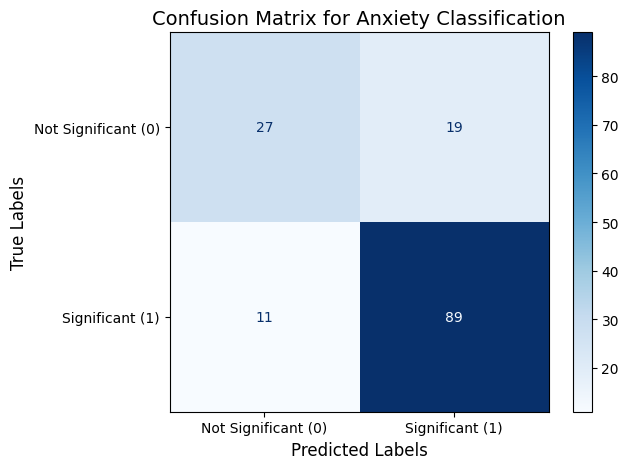

In [41]:
# Generate predictions
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Significant (0)", "Significant (1)"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Anxiety Classification', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()

The confusion matrix reveals that the model correctly identifies 89 significant cases of anxiety as significant (True Positives, TP = 89) and accurately classifies 27 not significant cases as not significant (True Negatives, TN = 27).

However, 19 cases are incorrectly classified as significant when they are not (False Positives, FP = 19), lowering precision.

Additionally, 11 significant cases are missed and classified as not significant (False Negatives, FN = 11), which impacts recall.

## Precision-Recall Curve (PRC)

Next, the *Precision-Recall Curve* is visualized to evaluate the model's performance specifically for the positive class. This curve highlights the trade-off between precision (the proportion of true positives among predicted positives) and recall (the proportion of true positives among actual positives) as the classification threshold varies.

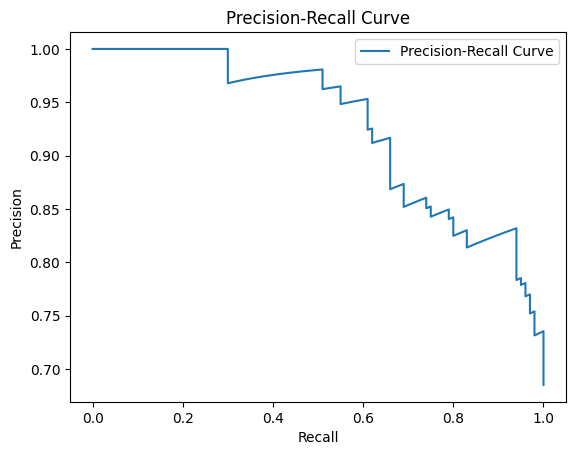

In [42]:
# Predicted probabilities for the positive class
y_prob = best_estimator.predict_proba(X_test)[:, 1]

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the curve
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

The Precision-Recall Curve shows that the model achieves an overall balance but does not fully reach optimal performance.

- At lower thresholds, recall improves but precision drops to around 0.7 due to false positives.
- At higher thresholds, precision increases but recall declines.

While the trade-off is reasonable, the model struggles to maintain consistently high precision across all recall values.

## ROC Curve and AUC

The *ROC Curve* is visualized to assess the model's overall performance by analyzing the *trade-off* between recall (true positive rate) and the false positive rate across thresholds.

Unlike the Precision-Recall Curve, which focuses on the positive class, the ROC Curve provides a global view of the classifier's ability to distinguish between classes.

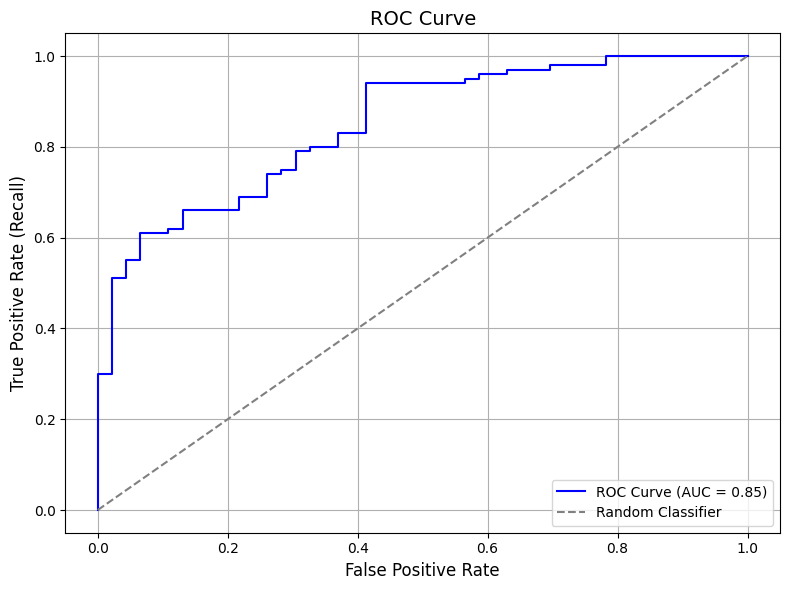

In [43]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC using 'roc_auc_score'
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")  # Diagonal reference line
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

The ROC Curve indicates the model's ability to distinguish between classes, with an *AUC (Area Under the Curve)* of 0.85.

While the model performs better than random guessing (AUC = 0.5), the curve's deviation from the ideal step-like shape highlights room for improvement in balancing recall and the false positive rate.

## Learning curve

The *Learning Curve* is visualized to evaluate the model's performance as a function of the training set size. This analysis helps identify issues such as overfitting or underfitting by comparing the model's accuracy on the training and validation sets.

In [44]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_estimator,              
    X=X_train,
    y=y_train,
    train_sizes=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Proportions of training data
    cv=5,
    n_jobs=-1,
    scoring='f1',
    shuffle=False
)

(0.6, 1.03)

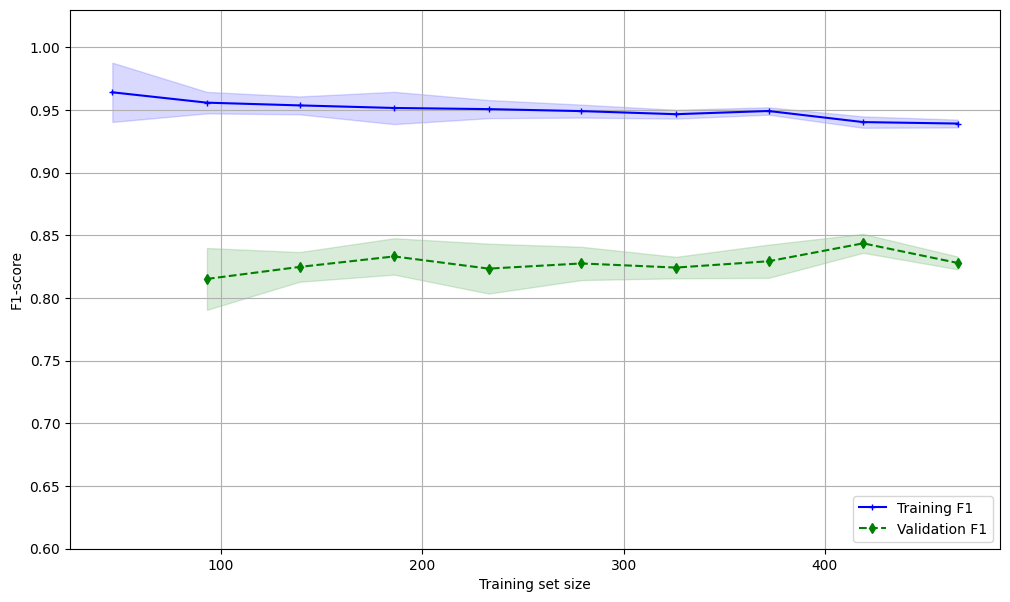

In [45]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training F1')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation F1')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

The learning curve indicates that the model is overfitted:

- *Training F1 Score*: The training curve starts at a perfect F1 score (1.0) but gradually decreases as the training set size increases. This behavior is expected as the model encounters more diverse data, making it harder to fit perfectly. However, the training F1 score remains consistently high, suggesting that the model is fitting noise and struggling to generalize.

- *Validation F1 Score*: The validation curve is relatively stable but consistently lower than the training curve, indicating poor generalization. This persistent gap between the two scores highlights overfitting, as the model performs well on the training data but struggles to replicate this performance on unseen data.

- *Convergence*: The gap between the training and validation scores does not significantly narrow as the training size increases. Adding more data might help reduce overfitting.

## Validation curve

The Validation Curve is visualized to analyze the model's performance as a function of a specific hyperparameter.

I chose <code>max_depth</code> of the Random Forest Classifier as the parameter, as it directly controls the complexity of the trees. 

In [49]:
# Define the range of max_depth values to analyze
range_max_depth = [5, 10, 15, 20, 25, 30, 50, 100] 

train_scores, test_scores = validation_curve(
    estimator=best_estimator,
    X=X_train, 
    y=y_train, 
    param_name='classifier__max_depth',
    param_range=range_max_depth,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

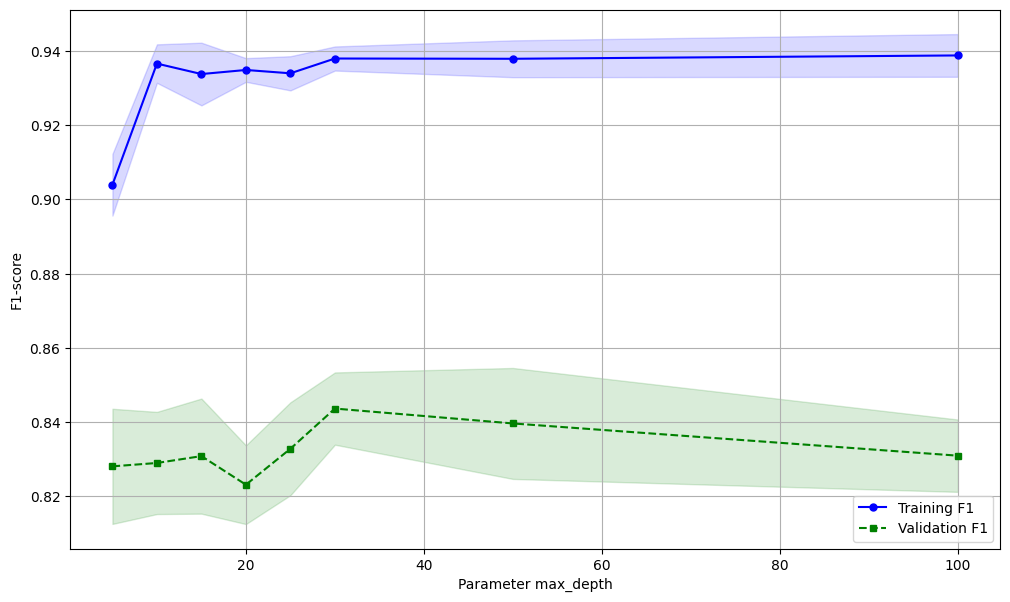

In [50]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_max_depth, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training F1')

ax.fill_between(range_max_depth,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_max_depth, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation F1')

ax.fill_between(range_max_depth,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter max_depth')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
plt.show()

The plot shows that the training F1 score increases with <code>max_depth</code> and plateaus around 0.94, while the validation F1 score peaks around <code>max_depth</code> of 20-30 and then remains stable or slightly decreases.

This suggests that a <code>max_depth</code> of 30 is a reasonable choice, as it balances model complexity and generalization, with no significant improvement beyond this value.

# Conclusion

In conclusion, this project confirms the relationship between the significance of anxiety based on user-reported data, music preferences, habits, and associated mental health conditions.

The final model, a RandomForestClassifier, demonstrated strong performance with an F1 Score of 0.856, Precision of 0.824, Recall of 0.89, and an Accuracy of 0.795. The comprehensive evaluation metrics, including the Precision-Recall Curve (PRC), ROC AUC, confusion matrix, and learning and validation curves, provided valuable insights into the model’s effectiveness and ability to generalize.

However, while the model performs well, it is not perfect.

- The confusion matrix shows some misclassifications, particularly with instances labeled as Not Significant being incorrectly predicted as Significant and vice versa. This suggests that there is still room for improvement in the model’s ability to distinguish between the classes.

- Additionally, the learning curve indicated some overfitting, as the gap between training and validation performance does not significantly narrow as the training set size increases, highlighting overfitting.

Future work could focus on enhancing the model by incorporating additional features and data to improve its ability to generalize and its performance.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87871e0b-fc75-4a3d-b8c5-9fe823162465' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>